<a href="https://colab.research.google.com/github/khatamimuhammad/202131060_Muhammadkhatami_UTS_PM_B/blob/main/Final_Project_ATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Customer Segmentation Airline Passenger Satisfaction


Tahapan analisis :
1. Business Understanding
2. Data Understanding
3. Data Preparation (Exploratory Data Analysis, Cleaning, Manipulation, Feature Engineering)
4. Data Exploration & Visualization (melalui dashboard Power BI/Tableau)
5. Implementasi Use Case Bisnis: Customer Segmentation
6. Export hasil & insight untuk pembuatan dashboard interaktif

### Data Understanding

Dataset ini berisi survei dari ribuan penumpang yang menilai berbagai aspek layanan maskapai, seperti **kenyamanan kursi, layanan, makanan dan minuman, kebersihan kabin, serta ketepatan waktu penerbangan**.

Dataset yang digunakan adalah **Airline Passenger Satisfaction Dataset** dari Kaggle:  
🔗 https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction  


Dataset Ini Berisi 25976 Baris dan  24 Kolom

### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

### Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Dataset_Tugas_Idbimbing'

df = pd.read_csv("Airline_Passenger_Satisfaction.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Dataset_Tugas_Idbimbing


### Data Preparation


Tahapan ini mencakup proses pembersihan data, manipulasi kolom,
dan pembuatan fitur baru untuk memahami karakteristik pelanggan
serta menyiapkan dataset agar siap divisualisasikan di dashboard.

Langkah-langkah meliputi:
- Menangani missing value, duplikat, dan outlier.
- Menstandarkan format data pada kolom kepuasan.
- Membuat fitur baru: Total_Service_Score, Travel_Experience_Score, Age_Group, dan Delay_Category.
- Mengevaluasi hubungan antar variabel dengan korelasi (heatmap).


### 1. EDA

In [3]:
df.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
df.tail(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [5]:
df.shape

(25976, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [7]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


Dataset berisi 25.976 data pelanggan dengan 25 kolom, dan haanya terdapat 83 nilai kosong pada kolom Arrival Delay in Minutes.
Rata-rata usia pelanggan adalah 39,6 tahun (rentang 7–85), menunjukkan dominasi kelompok usia produktif.
Rata-rata jarak penerbangan sebesar 1.194 km dengan standar deeviasinya 998 km, menandakan variasi antara penerbangan jarak pendek dan jarak jauh.

Nilai rata-ratanya penilaian layanan berada pada kisaran 3–3,5, yang menunjukkan tingkat kepuasan cukup baik namun belum optimal.

Skor tertingginya atau MAX : Inflight Service (3,65) dan Seat Comfort (3,45)

Skor terendah atau Minnya|: Inflight Wifi Service (2,72) dan Ease of Online Booking (2,76)

Rata-rata keterlambatan keberangkatan sebesar 14,3 menit dan kedatangan sebesar 14,7 menit



### 2. Data Cleaning

In [8]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

- Cek Missing Velue

In [9]:
df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [10]:
df['Arrival Delay in Minutes'].isnull().sum()

np.int64(83)

In [11]:
df['Arrival Delay in Minutes']

,Arrival Delay in Minutes
0,44.0
1,0.0
2,0.0
3,6.0
4,20.0
...,...
25971,0.0
25972,0.0
25973,0.0
25974,0.0


- memperbaiki missing velue di kolom Arrival Delay in Minutes

In [12]:
arrival_delay = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(arrival_delay, inplace=True)

In [13]:
df['Arrival Delay in Minutes'].isnull().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

- cek duplikat

In [15]:
df.duplicated().sum()

np.int64(0)

- cek outlier

In [16]:
kolom_numeriknya = df.select_dtypes(include=['int64', 'float64']).columns

outliernya = {}

for col in kolom_numeriknya:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliernya[col] = len(outliers)

# Hasil ringkasan jumlah outlier per kolom
outlier_df = pd.DataFrame(list(outliernya.items()), columns=['Kolom', 'Jumlah Outlier'])
outlier_df.sort_values(by='Jumlah Outlier', ascending=False)

,Kolom,Jumlah Outlier
17,Departure Delay in Minutes,3569
18,Arrival Delay in Minutes,3538
14,Checkin service,3218
2,Flight Distance,584
0,id,0
1,Age,0
3,Inflight wifi service,0
7,Food and drink,0
4,Departure/Arrival time convenient,0
5,Ease of Online booking,0


Hasil analisis pada outliernya menunjukkan adanya outlier  pada kolom Departure Delay (3.569), Arrival Delay (3.538), Checkin Service (3.218), dan Flight Distance (584).

Outliernya inii tidak dihapus atau dimanipulasi karena merpresentasikan variasi nyata dalam data operasional — seperti keterlambatan ekstrem penerbangan, perbedaan pengalaman layanan check-in, dan jarak rute yang sangat bervariasi.

Dengan demikian, datanya tetap diprtahankan aagar analisis tetap mencerminkan kondisi riil, bukan hasil pembersihan berlebihan yang bisa menghilangkan informasi penting

- cek korelassi

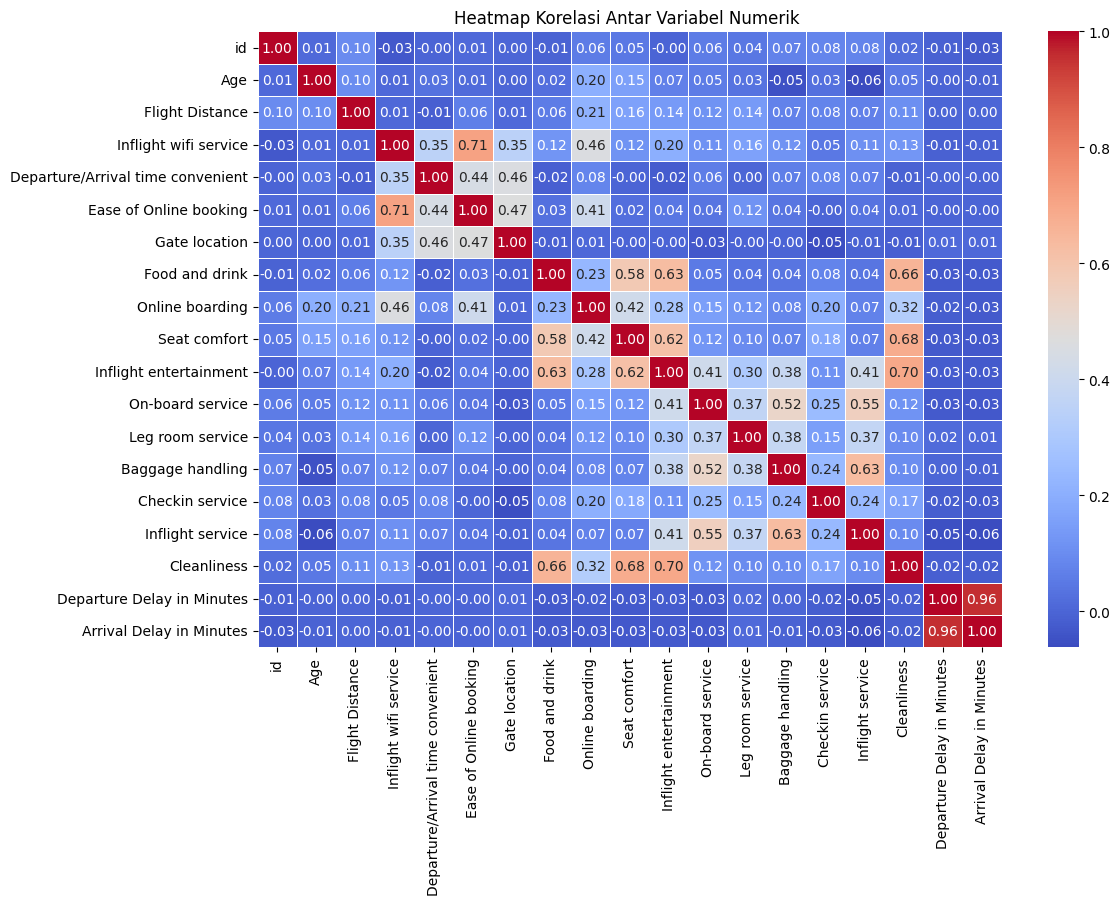

In [17]:
# Hitung korelasi di data numeriknya
corr_matrix = df[kolom_numeriknya].corr(method='pearson')

# Visualisasi korelasi dalam heatmapsn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik ")
plt.show()

Secara keseluruhanya, korelasi antar variabel di dataset ini tidak menunjukkan adanya multikolinearitas berlebihan, sehingga semua fitur masih relevan digunakan dalam analisis lanjutan. Korelasi kuat terlihaat tertama pada pasangan Departure Delay in Minutes” dan “Arrival Delay in Minutes , yang secara operasional memang saling berkaitan — semakin lama keterlambatan saat keberangkatan, semakin besar kemungkinan pesawat juga mengalami keterlambatan saat tiba.

Selain ituu, terdapat korelsi positif antara variabel seperti “Checkin Service”, Inflight Service, dan Seat Comfort, yang menunjukkan bahwa penilaian terhadap kenyamanan dan kualitas layanan cenderung meningkat secara bersamaan — semakin baik pelayanan, semakin baik pula persepsi kenyamanan penumpang.

Seluruh data ini tidak dimanipulasii maupun dihapussih, karena mencerminkan kondisi dan persepsi nyata dari pengalaman penerbanganya, sehngga penting untuk tetap dipertahankan guna menjaga validitas hasil analisis.

### 3. Data Manipulation & Feature Engineering

Tahapan ini bertujuan menyiapkan data agar siap untuk analisis segmentasi pelanggan.
Proses mencakup pebuataan fitur baru dari data kepuasan dan pengalaman pelangganya
serta pengelompokan demografis dan operasionalnyasih.

#### A. Membuat Total Service Score untuk mempresentasikan layananya dari beberapa kolom disini yang saya gunakan hanya kolom untuk layanann di atas peswatnya saja atau pengelaman terbangnya

In [18]:
kolom_servis_score = [
    'Inflight wifi service',
    'Seat comfort',
    'Food and drink',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

- Hitung skor rata-rata dari seluruh aspek layanannya

In [19]:
df['Total_Service_Score'] = df[kolom_servis_score].mean(axis=1)

In [20]:
df['Total_Service_Score']

,Total_Service_Score
0,4.3
1,3.9
2,2.2
3,1.9
4,2.6
...,...
25971,3.7
25972,4.4
25973,3.0
25974,3.8


Fitur ini menggambarkan pengalaman pelanggan selama penerbangan.
Semakin tinggi nilai Total_Service_Score, semakin baik persepsi terhdap kenyaamanan dan pelayanan.
Fitur ini akan menjadi metrik utama dalam dashboard untuk menilai kualitas layanannya

#### B. Membuat Travel_Experience_Score untuk mempresentasikan layananya dari beberapa kolom disini yang saya gunakan hanya kolom untuk layanann di sebelum penerbangnya saasih

In [21]:
kolom_Travel_Experience_Score= [
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Online boarding'
]

In [22]:
# Hitung skor rata-rata pengalaman sebelum-penerbangan
df['Travel_Experience_Score'] = df[kolom_Travel_Experience_Score].mean(axis=1)
df['Travel_Experience_Score'].head(10)

,Travel_Experience_Score
0,3.75
1,2.25
2,2.00
3,1.50
4,2.75
5,3.50
6,5.00
7,2.50
8,2.75
9,2.50


Travel_Experience_Score merepresentasikan pengalaman pelanggan sebelum penerbangan
misalnya kenyamanan saat boarding, kemudahan booking, dan penjadwalanya.
Nilai ini membantu maskpai menilai efektivitas sistem dan pelayanan seblum terbang.

#### C. Membuat AGE_GROUPuntuk membedakan pelanggan berdasarkan kelompok usia

Bagian ini digunakan untuk mengelompokkan pelanggan ke dalam kategori usia tertentu agar dapat dilakukan analisis segmentasi demografis.
Segmentasi usia penting karena preferensi dan kepuasan pelanggan sering kali berbeda pada tiap rentang umur

In [23]:
df['Age'].describe()

,Age
count,25976.000000
mean,39.620958
std,15.135685
min,7.000000
25%,27.000000
50%,40.000000
75%,51.000000
max,85.000000


In [24]:
# Membuat rentang usia berdasarkan konteks maskapai penerbangan
rentang_usia = [6, 12, 18, 40, 60, 90]
labels = ['Anak-anak (7–12)', 'Remaja (13–18)', 'Dewasa (19–40)', 'Paruh Baya (41–60)', 'Lansia (61–90)']

df['Age_Group'] = pd.cut(df['Age'], bins=rentang_usia, labels=labels, include_lowest=True)


df['Age_Group'] = pd.cut(df['Age'], bins=rentang_usia, labels=labels, right=True, include_lowest=True)

print("Distribusi Kelompok Usia:")
df['Age_Group'].value_counts().sort_index()

Distribusi Kelompok Usia:


,count
Age_Group,
Anak-anak (7–12),904
Remaja (13–18),1257
Dewasa (19–40),11151
Paruh Baya (41–60),10586
Lansia (61–90),2078


Segmentasi usia menunjukkan bahwa mayoritas pelanggan berada pada kelompok Dewasa 19–40 tahunsih ini yang merupakan target utama maskapainya ini mausk di segmentasi demografik

#### D. Membuat Kategori delainya
Untuk memahami dampak keterlambatan penerbangan terhadap kepuasan pelanggan, disini saya ubah nilai keterlambatan menjadi kategori berdasarkan durasi dilainya.

In [25]:
# Membuat kategori keterlambatan berdasarkan waktunya (menit)
df['Delay_Category'] = pd.cut(
    df['Departure Delay in Minutes'],
    bins=[-1, 14, 29, 119, float('inf')],
    labels=['On-Time', 'Minor Delay', 'Moderate Delay', 'Severe Delay']
)
# Melihatt jumlah masing-masing kategori
print("Distribusi Kategori Keterlambatan:")
df['Delay_Category'].value_counts().sort_index()

Distribusi Kategori Keterlambatan:


,count
Delay_Category,
On-Time,20050
Minor Delay,2264
Moderate Delay,3098
Severe Delay,564


Delay_Category ini mengeelompokkan pelangggan berdasarkan tingkat keterlambatan penerbanganya dan Kategori ini penting karena keterlambatan menjadi salah satu faktor utama yang memengaruhi kepuasan pelanggan.

/tmp/ipython-input-131221636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delay_Category', data=df, palette='Set2')


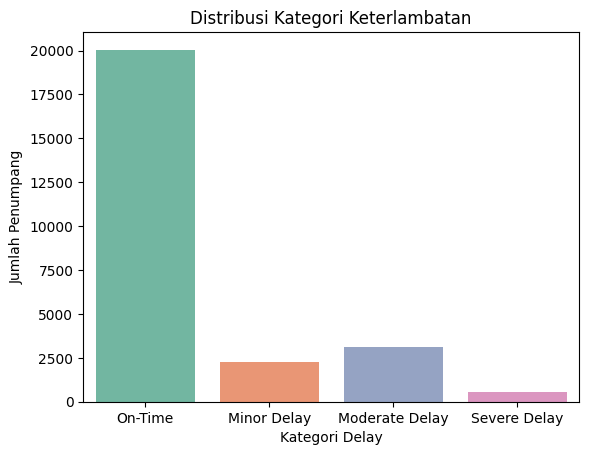

In [26]:
sns.countplot(x='Delay_Category', data=df, palette='Set2')
plt.title('Distribusi Kategori Keterlambatan')
plt.xlabel('Kategori Delay')
plt.ylabel('Jumlah Penumpang')
plt.show()


#### E. Processing Kolom Kepuasan Pelanggan


Prosses ini adalah untuk menstandarkan kolom kepuasan  pplanggan agar dapat digunakan untuk analisis eksploratif dan visualisasi dashboard.

- Kolom 'satisfaction' digunakan untuk kategori teks ('satisfied' atau 'neutral or dissatisfied'),
  sehingga dapat ditampilkan sebagai label, filter, atau legenda pada chart.
- Kolom 'Satisfaction_Numerik' mengonversi kepuasan menjadi nilai 1 (puas) dan 0 (tidak puas),
  agar dapat digunakan untuk perhitungan metrik kuantitatif seperti persentase pelanggan puas
  atau rata-rata kepuasan berdasarkan segmen tertentu.

In [27]:
df['satisfaction']

,satisfaction
0,satisfied
1,satisfied
2,neutral or dissatisfied
3,satisfied
4,satisfied
...,...
25971,neutral or dissatisfied
25972,satisfied
25973,neutral or dissatisfied
25974,satisfied


In [28]:
# Bersihkan dan standarkan teks untuk menghilangkan titik koma atau lainya
df['satisfaction'] = df['satisfaction'].astype(str).str.strip().str.lower()

#  Buat kolom numeriknya
#  = puas (Satisfied), 0 = tidak puas (Neutral or Dissatisfied)
df['Satisfaction_Numerik'] = df['satisfaction'].apply(
    lambda x: 1 if x == 'satisfied' else 0
)

print("Distribusi Kategori Kepuasan (Teks):")
print(df['satisfaction'].value_counts(), '\n')

print("Distribusi Kategori Kepuasan (Numerik):")
print(df['Satisfaction_Numerik'].value_counts(), '\n')


Distribusi Kategori Kepuasan (Teks):
satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64 

Distribusi Kategori Kepuasan (Numerik):
Satisfaction_Numerik
0    14573
1    11403
Name: count, dtype: int64 



/tmp/ipython-input-801725703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette='Set2', ax=ax[0])
/tmp/ipython-input-801725703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction_Numerik', data=df, palette='Set1', ax=ax[1])


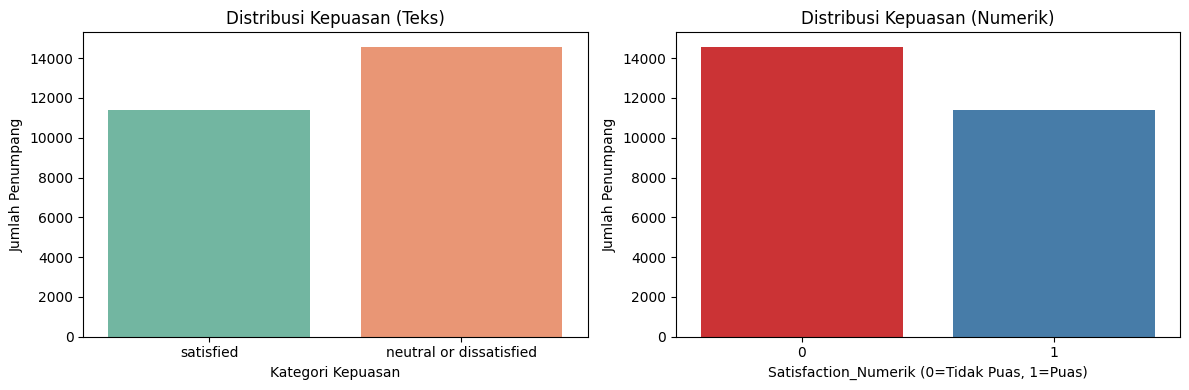

In [29]:
# Visualisasinya sbgi perbandingan
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# sesuai alinya dalam teks
sns.countplot(x='satisfaction', data=df, palette='Set2', ax=ax[0])
ax[0].set_title('Distribusi Kepuasan (Teks)')
ax[0].set_xlabel('Kategori Kepuasan')
ax[0].set_ylabel('Jumlah Penumpang')

# Versi numeriknya
sns.countplot(x='Satisfaction_Numerik', data=df, palette='Set1', ax=ax[1])
ax[1].set_title('Distribusi Kepuasan (Numerik)')
ax[1].set_xlabel('Satisfaction_Numerik (0=Tidak Puas, 1=Puas)')
ax[1].set_ylabel('Jumlah Penumpang')

plt.tight_layout()
plt.show()

Grafik ini menunjukkan bahwa sebagian besar pelanggan masih belum puas dengan layanan maskapai, terliht dari jumlah kategori “neutral or dissatisfied” yang lebih tinggi dibandingkan “satisfied.” Kondisi ini menandakan adanya ruang perbaikan yang cukup besar dalam kualitas pelayanan, pengalaman penunmpangnya disaat  pra-penerbangan, maupun ketepatan waktu penerbangan rrepresentasi numerik Satisfaction_Numerik memperkuat hasil ini, di mana nilai 0 tidak puas lebih dominan dibanding 1 puas. Kedua kolom ini saling melengkapi — format teks memudahkan interpretasi visual, sedangkan format numerik memungkinkan analisis kuantitatif dan pembuatan KPI di Power BI, seperti Persentase Pelangganya Puas, Rata-rata Kepuasan Berdasarkan Delay, atau Kepuasan Berdasarkan Kategori Usia, sehingga mendukung pemahamn yang lebiih komprehensif terhadap perilaku dan kepuasan pelanggan.

### F. Cek kembali hasil dari hasil data manipulation dan feture engineeringnya

In [30]:
df[['Total_Service_Score', 'Travel_Experience_Score', 'Age_Group',
    'Delay_Category','satisfaction', 'Satisfaction_Numerik']].head(20)

,Total_Service_Score,Travel_Experience_Score,Age_Group,Delay_Category,satisfaction,Satisfaction_Numerik
0,4.3,3.75,Paruh Baya (41–60),Moderate Delay,satisfied,1
1,3.9,2.25,Dewasa (19–40),On-Time,satisfied,1
2,2.2,2.00,Dewasa (19–40),On-Time,neutral or dissatisfied,0
3,1.9,1.50,Paruh Baya (41–60),On-Time,satisfied,1
4,2.6,2.75,Paruh Baya (41–60),On-Time,satisfied,1
5,3.2,3.50,Remaja (13–18),On-Time,satisfied,1
6,4.5,5.00,Lansia (61–90),On-Time,satisfied,1
7,3.9,2.50,Paruh Baya (41–60),Moderate Delay,satisfied,1
8,4.0,2.75,Paruh Baya (41–60),On-Time,satisfied,1
9,3.8,2.50,Paruh Baya (41–60),Minor Delay,satisfied,1


In [31]:
df[['Total_Service_Score', 'Travel_Experience_Score', 'Age_Group',
    'Delay_Category','satisfaction', 'Satisfaction_Numerik']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Total_Service_Score      25976 non-null  float64 
 1   Travel_Experience_Score  25976 non-null  float64 
 2   Age_Group                25976 non-null  category
 3   Delay_Category           25976 non-null  category
 4   satisfaction             25976 non-null  object  
 5   Satisfaction_Numerik     25976 non-null  int64   
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 863.0+ KB


In [32]:
df[['Total_Service_Score', 'Travel_Experience_Score', 'Age_Group',
    'Delay_Category','satisfaction', 'Satisfaction_Numerik']].describe()

,Total_Service_Score,Travel_Experience_Score,Satisfaction_Numerik
count,25976.000000,25976.000000,25976.000000
mean,3.336580,3.010587,0.438982
std,0.743644,0.973058,0.496272
min,1.000000,0.250000,0.000000
25%,2.800000,2.250000,0.000000
50%,3.400000,3.000000,0.000000
75%,3.900000,3.750000,1.000000
max,5.000000,5.000000,1.000000


Hasil Feature Engineering:
Dataset kini memiliki fitur-fitur baru yang siap digunakan untuk eksplorasi visualisasi:
- Total_Service_Score → Persepsi layanan selama penerbangan
- Travel_Experience_Score → Pengalaman pra-penerbangan
- Age_Group → Segmentasi demografis pelanggan
- Delay_Category → Segmentasi operasional penerbangan
- Satisfaction_Numerik → Tingkat kepuasan pelanggan

### 4. Exploratory Data Analysis (EDA) Awal
untuk memahami pola dan distribusi awal data hasil feature engineering
sebelum divisualisasikan ke dalam dashboard.

/tmp/ipython-input-870742364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette='pastel')


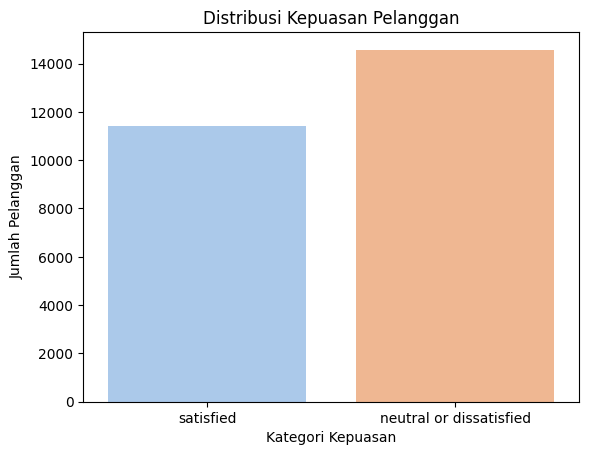

In [33]:
# Distribusi kepuasan pelanggan
sns.countplot(x='satisfaction', data=df, palette='pastel')
plt.title('Distribusi Kepuasan Pelanggan')
plt.xlabel('Kategori Kepuasan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

- Sebagian besar pelanggan masih merasa tidak puas atau netral terhadap layanan maskapainya ini
Dari grafik terlihat sekitar 14.500 pelanggan  masuk kategori neutral or dissatisfied, sedangkan hanya 11.400 pelanggan  yang merasa satisfied.

- Ketimpangan ini menunjukkan adanya potensi perbaikan layanan, terutama di area pengalaman pra-penerbangan atau keterlambatan penerbangan.

- hasil ini segmentasi pelanggan ini untuk mengidentifikasi segmen yang paling berisiko churn berhenti menggunakan layananya.

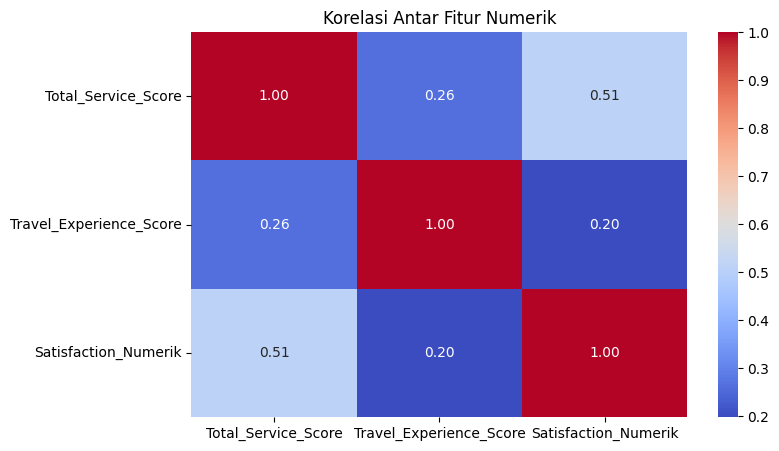

In [34]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Total_Service_Score', 'Travel_Experience_Score', 'Satisfaction_Numerik']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

- Nilai korelasi positif antara Total_Service_Score dan kepuasan pelanggan menunjukkan
  bahwa kualitas pelayanan dalam penerbangan sangat berpengaruh terhadap tingkat kepuasan.
- Korelasi Travel_Experience_Score juga cukup kuat, artinya pengalaman pra-penerbangan
  turut menentukan persepsi pelanggan terhadap layanan maskapai.

/tmp/ipython-input-2432202744.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Delay_Category', y='Satisfaction_Numerik', data=df, palette='viridis', ci=None)
/tmp/ipython-input-2432202744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delay_Category', y='Satisfaction_Numerik', data=df, palette='viridis', ci=None)


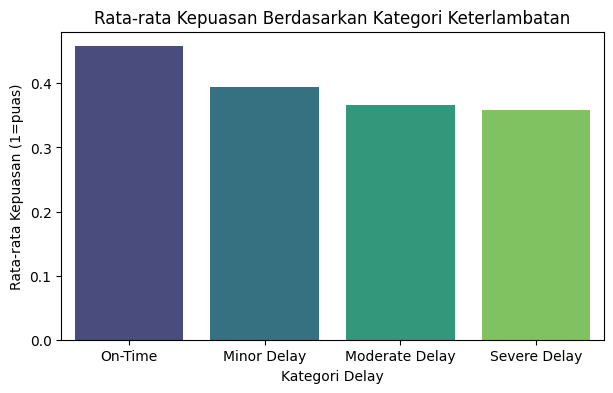

In [35]:
# Distribusi Delay Category terhadap Kepuasan
plt.figure(figsize=(7, 4))
sns.barplot(x='Delay_Category', y='Satisfaction_Numerik', data=df, palette='viridis', ci=None)
plt.title('Rata-rata Kepuasan Berdasarkan Kategori Keterlambatan')
plt.ylabel('Rata-rata Kepuasan (1=puas)')
plt.xlabel('Kategori Delay')
plt.show()

Terlihat bahwa Pelanggan masih cukup toleran terhadap minor delay, namun akan mulai kehilangan kepercayaan bila keterlambatan melebihi satu jam.

Kategori Severe Delay menunjukkan segmen pelanggan berisiko tinggi churn, karena pengalaman buruksih ini sangat memengaruhi persepsi terhadap keseluruhan layanan maskapainya

###  5. Export Datasetnya

In [36]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total_Service_Score', 'Travel_Experience_Score',
       'Age_Group', 'Delay_Category', 'Satisfaction_Numerik'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 25976 non-null  int64   
 1   Gender                             25976 non-null  object  
 2   Customer Type                      25976 non-null  object  
 3   Age                                25976 non-null  int64   
 4   Type of Travel                     25976 non-null  object  
 5   Class                              25976 non-null  object  
 6   Flight Distance                    25976 non-null  int64   
 7   Inflight wifi service              25976 non-null  int64   
 8   Departure/Arrival time convenient  25976 non-null  int64   
 9   Ease of Online booking             25976 non-null  int64   
 10  Gate location                      25976 non-null  int64   
 11  Food and drink                     25976 

- Konversi tipe category ke string sebelum ekspor
Tujuannya agar kolom 'Age_Group' dan 'Delay_Category' dapat terbaca dengan benar di Power BInya atau tidak perlu ubhlgi nantinya.



In [38]:
## ubah tipe datanya agar tidak repot ubah lagi power binya knp tidak di ubah di atas tadi karena pada bagian pd.cut() menghasilkan tipe CategoricalDtype, bukan object stringsih, dan category lebih hemat memori dan cepat untuk value_counts() dan groupby() .
df['Age_Group'] = df['Age_Group'].astype(str)
df['Delay_Category'] = df['Delay_Category'].astype(str)

df[['Age_Group','Delay_Category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age_Group       25976 non-null  object
 1   Delay_Category  25976 non-null  object
dtypes: object(2)
memory usage: 406.0+ KB


Ubah tipe data ini bertujuan karena
secara default, fungsi pd.cut() menghasilkan tipe data CategoricalDtype, bukan object (string). Tipe ini sengaja dibiarkan tetap sebagai kategori karena lebih efisien untuk analisis data — category lebih hemat memori, lebih cepat diproses dalam operasi seperti value_counts() dan groupby(), serta memungkinkan urutan label yang logis, misalnya pada rentang usia atau tingkat keterlambatan. Selain itu, banyak fungsi analisis dan visualisasi seperti pandas atau seaborn dapat langsung mengolah tipe kategori tanpa perlu konversi. Konversi ke tipe string baru dilakukan di tahap akhir sebelum ekspor ke Power BI agar data dapat terbaca sebagai teks dan dapat digunakan dengan benar pada slicer, filter, atau label visual di dashboard.

In [39]:
kolom_finalnya = [
    'id', 'Gender', 'Customer Type', 'Type of Travel', 'Class',
    'Age', 'Age_Group', 'Flight Distance',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Delay_Category',
    'Inflight wifi service', 'Seat comfort', 'Food and drink',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
    'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Online boarding',
    'Total_Service_Score', 'Travel_Experience_Score',
    'satisfaction', 'Satisfaction_Numerik'
]

# memaastikan hanya kolom yang tersedia
kolom_finalnya = [col for col in df.columns if col.strip().lower() in [c.strip().lower() for c in kolom_finalnya]]

In [40]:
# Buat DataFrame finalnya
df_final = df[kolom_finalnya].copy()
df_final.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_Service_Score,Travel_Experience_Score,Age_Group,Delay_Category,Satisfaction_Numerik
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,50,44.0,satisfied,4.3,3.75,Paruh Baya (41–60),Moderate Delay,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,5,0,0.0,satisfied,3.9,2.25,Dewasa (19–40),On-Time,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,2,0,0.0,neutral or dissatisfied,2.2,2.00,Dewasa (19–40),On-Time,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,4,0,6.0,satisfied,1.9,1.50,Paruh Baya (41–60),On-Time,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,4,0,20.0,satisfied,2.6,2.75,Paruh Baya (41–60),On-Time,1


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

Dataset final ini mencakup seluruh hasil proses darri cleaning, manipulation, feature engineeringnya

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [43]:
fitur_kepuasan = df[['Inflight wifi service',
                     'Departure/Arrival time convenient',
                     'Ease of Online booking',
                     'Gate location',
                     'Food and drink',
                     'Online boarding',
                     'Seat comfort',
                     'Inflight entertainment',
                     'On-board service',
                     'Leg room service',
                     'Baggage handling',
                     'Checkin service',
                     'Inflight service',
                     'Cleanliness']].copy()

### Encoding Kolom Kategori

In [44]:
# label_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
# le = LabelEncoder()

# for col in label_cols:
#     fitur_demografi[col] = le.fit_transform(fitur_demografi[col])

### Scaling

In [45]:
scaler = StandardScaler()
fitur_scaled_kepuasan = scaler.fit_transform(fitur_kepuasan)

### Dendrogram

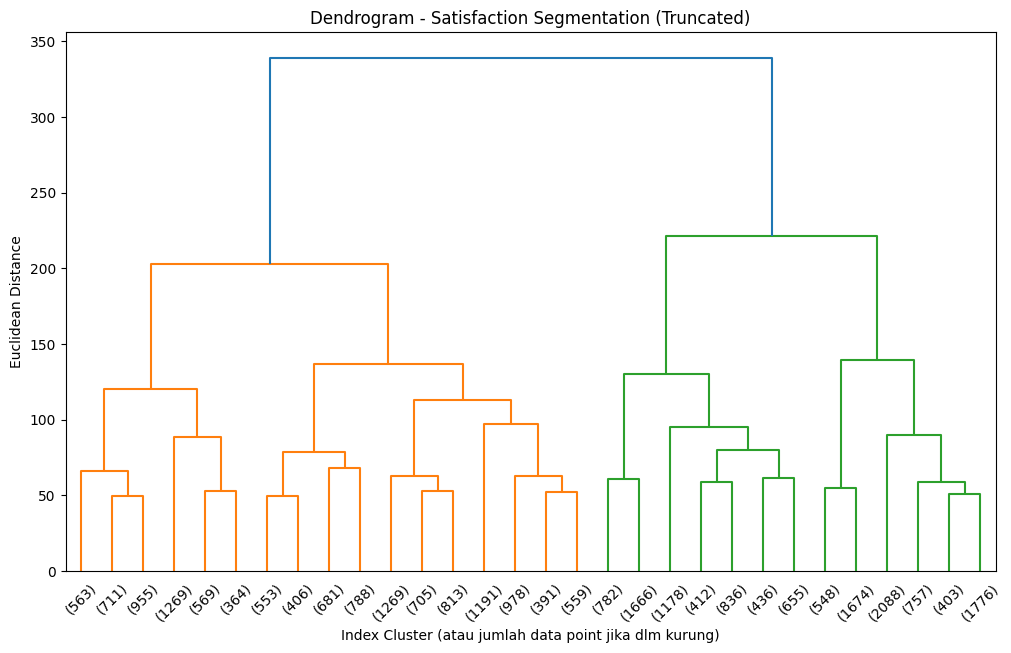

In [46]:
plt.figure(figsize=(12, 7))
linked_kepuasan = linkage(fitur_scaled_kepuasan, method='ward')

dendrogram(
    linked_kepuasan,
    truncate_mode='lastp',
    p=30,
    show_leaf_counts=True
)

plt.title("Dendrogram - Satisfaction Segmentation (Truncated)")
plt.xlabel("Index Cluster (atau jumlah data point jika dlm kurung)")
plt.ylabel("Euclidean Distance")
plt.show()

### Hierarchical Clustering

In [47]:
N_CLUSTERS = 3

cluster_kepuasan = AgglomerativeClustering(n_clusters=N_CLUSTERS, linkage='ward')
df['Cluster_Kepuasan'] = cluster_kepuasan.fit_predict(fitur_scaled_kepuasan)

### Evaluasi Silhouette

In [48]:
silhouette_kepuasan = silhouette_score(fitur_scaled_kepuasan, df['Cluster_Kepuasan'])
print(f"Silhouette Score (Kepuasan, k={N_CLUSTERS}):", silhouette_kepuasan)


Silhouette Score (Kepuasan, k=3): 0.108348282737165


### Ringkasan Cluster

In [49]:
# 7. RINGKASAN CLUSTER (PROFILING)
# -------------------------------------------------
print(f"\n=== RATA-RATA PENILAIAN PER CLUSTER (k={N_CLUSTERS}) ===")
# Ini adalah bagian terpenting: Apa yang mereka rasakan?
profiling_kepuasan = df.groupby('Cluster_Kepuasan')[[
    'Inflight wifi service',
    'Seat comfort',
    'Food and drink',
    'On-board service',
    'Inflight entertainment',
    'Cleanliness'
]].mean()
print(profiling_kepuasan)

print(f"\n=== PROFIL DEMOGRAFI PER CLUSTER (k={N_CLUSTERS}) ===")
# Sekarang kita lihat SIAPA mereka
profiling_demografi = df.groupby('Cluster_Kepuasan')[[
    'Age',
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class'
]].agg(lambda x: x.value_counts().index[0]) # Ambil modus (paling umum)
profiling_demografi['Age'] = df.groupby('Cluster_Kepuasan')['Age'].mean() # Ganti Age dengan rata-rata
profiling_demografi['Count'] = df.groupby('Cluster_Kepuasan')['id'].count() # Lihat ukuran cluster
print(profiling_demografi)


print("\nCluster kepuasan selesai. Kolom hasil: 'Cluster_Kepuasan' ✅")


=== RATA-RATA PENILAIAN PER CLUSTER (k=3) ===
                  Inflight wifi service  Seat comfort  Food and drink  \
Cluster_Kepuasan                                                        
0                              2.541089      2.633999        2.469095   
1                              3.867651      4.417748        3.985509   
2                              1.729422      4.017267        3.876781   

                  On-board service  Inflight entertainment  Cleanliness  
Cluster_Kepuasan                                                         
0                         2.941872                2.344301     2.405014  
1                         3.797819                4.300856     4.206183  
2                         3.834702                4.380889     4.054484  

=== PROFIL DEMOGRAFI PER CLUSTER (k=3) ===
                        Age  Gender   Customer Type   Type of Travel  \
Cluster_Kepuasan                                                       
0                 38.696436  